Index number : 190026T

Name         : AHAMED M.I.I

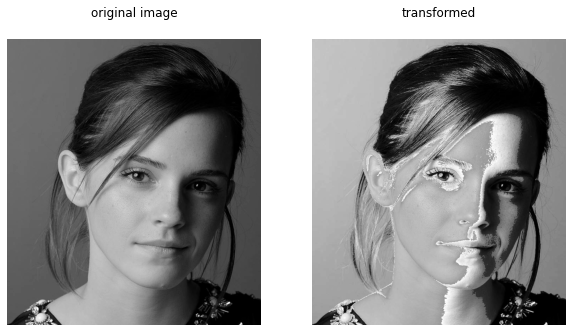

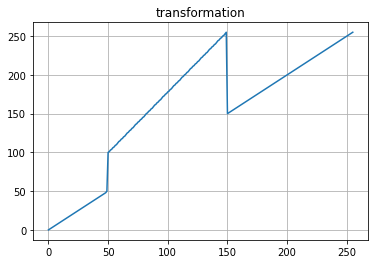

In [1]:
#1)
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

emma = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert emma is not None

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6))
ax1.imshow(emma, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('original image')
ax1.xaxis.tick_top()

transformation_1 = np.linspace(0,50,50)
transformation_2 = np.linspace(100,255,100)
transformation_3 = np.linspace(150,255,106)
transformation = np.concatenate([transformation_1, transformation_2, transformation_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(emma, transformation)

ax2.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax2.axis('off')
ax2.title.set_text('transformed')
ax2.xaxis.tick_top()

fig2, ax = plt.subplots()
ax.plot(transformation)
ax.grid()
ax.title.set_text('transformation')

del emma; del transformed
del transformation_1; del transformation_2; del transformation_3; del transformation

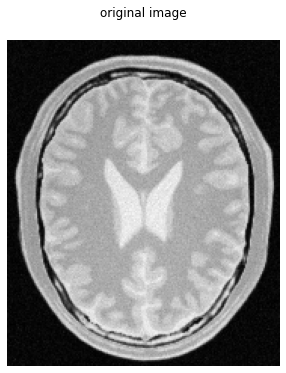

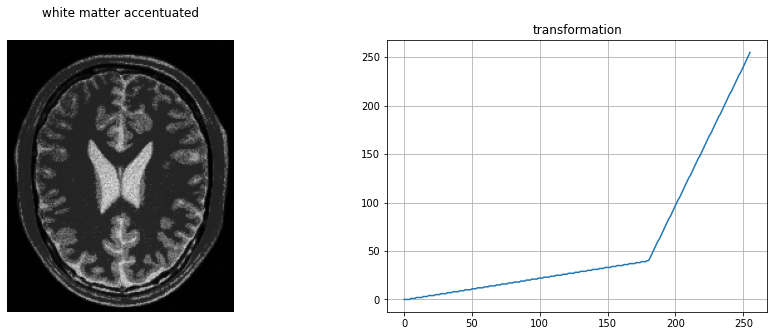

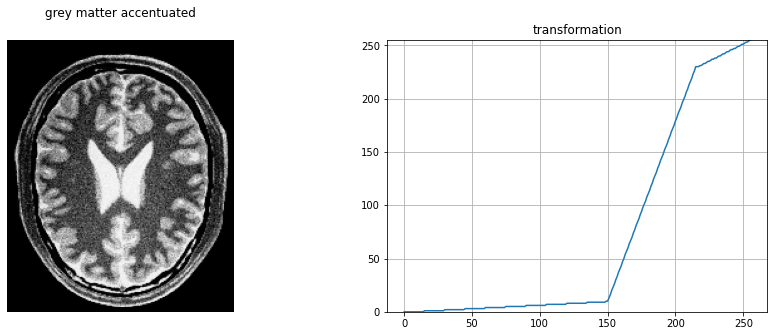

In [2]:
#2)
brain = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert brain is not None

fig1, ax = plt.subplots(figsize=(10,6))
ax.imshow(brain, cmap = 'gray', vmin =0, vmax=255)
ax.axis('off')
ax.title.set_text('original image')
ax.xaxis.tick_top()

#a) accentuate white matter
transformation_1 = np.linspace(0, 40, 180)  
transformation_2 = np.linspace(40, 255, 76)
transformation = np.concatenate([transformation_1, transformation_2], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(brain, transformation)

fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('white matter accentuated')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.grid()
ax2.title.set_text('transformation')

#b) accentuate grey matter
transformation_1 = np.linspace(0, 10, 150) 
transformation_2 = np.linspace(10, 230 ,66)
transformation_3 = np.linspace(230,255,40)
transformation = np.concatenate([transformation_1, transformation_2, transformation_3], axis=0).astype(np.uint8)
assert len(transformation) == 256

transformed = cv.LUT(brain, transformation)

fig3, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

ax1.imshow(transformed, cmap = 'gray', vmin =0, vmax=255)
ax1.axis('off')
ax1.title.set_text('grey matter accentuated')
ax1.xaxis.tick_top()

ax2.plot(transformation)
ax2.grid()
ax2.title.set_text('transformation')
ax2.set_ylim([0,255])

del brain; del transformed
del transformation_1; del transformation_2; del transformation_3; del transformation

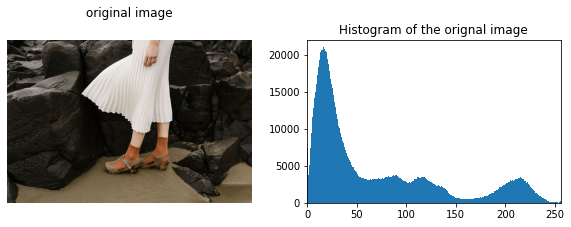

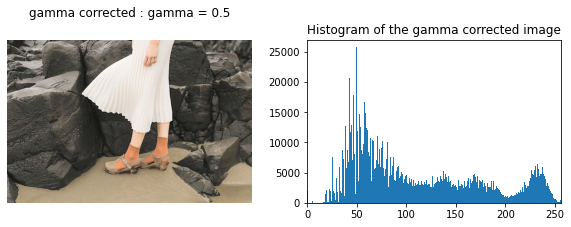

In [3]:
#3)
original = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\highlights_and_shadows.jpg', cv.IMREAD_COLOR)
assert original is not None
original_lab = cv.cvtColor(original, cv.COLOR_BGR2LAB)
L = original_lab[:,:,0]

fig1, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
original_rgb = cv.cvtColor(original, cv.COLOR_BGR2RGB)
ax1.imshow(original_rgb)
ax1.axis('off')
ax1.title.set_text('original image')
ax1.xaxis.tick_top()

ax2.set_xlim([0, 256])
ax2.title.set_text('Histogram of the orignal image')
ax2.hist(original_rgb.flatten(), 256, [0, 256]);

gamma = 0.5
correction = np.array([(pixel/255)**gamma*255 for pixel in range(0, 256)]).astype(np.uint8)
corrected = cv.LUT(L, correction)
original_lab[:,:,0] = corrected
corrected_rgb = cv.cvtColor(original_lab, cv.COLOR_LAB2RGB)

fig2, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.imshow(corrected_rgb)
ax1.axis('off')
ax1.title.set_text('gamma corrected : gamma = '+ str(gamma))
ax1.xaxis.tick_top()

ax2.set_xlim([0, 256])
ax2.title.set_text('Histogram of the gamma corrected image')
ax2.hist(corrected_rgb.flatten(), 256, [0, 256]);

del original; del original_lab; del original_rgb
del corrected; del corrected_rgb; del correction; del L

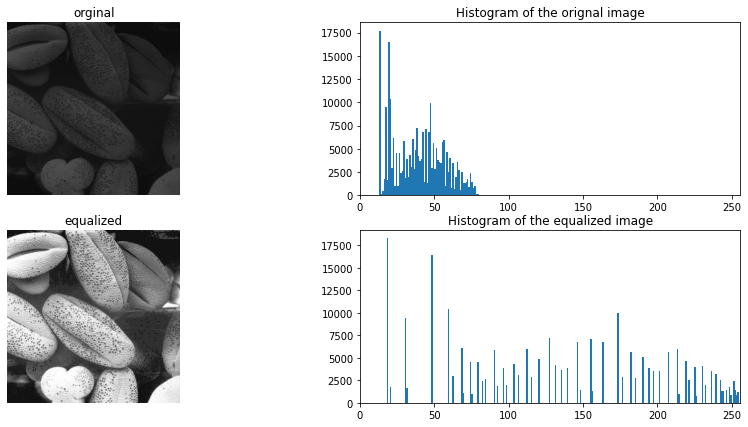

In [4]:
#4)
def histogramEqualization(image):
    hist ,bins = np.histogram(image.ravel(), 256, [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf*(len(hist)-1)/cdf.max()
    transformation = cdf_normalized.astype(int)
    equalized = cv.LUT(image, transformation)
    return equalized
    
shells = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\shells.png', cv.IMREAD_GRAYSCALE)
assert shells is not None

equalized = histogramEqualization(shells)

fig, ax = plt.subplots(2,2, figsize=(15,7))
ax[0,0].axis('off')
ax[0,0].title.set_text('orginal')
ax[0,0].imshow(shells, cmap = 'gray', vmin =0, vmax=255)

ax[0,1].set_xlim([0, 256])
ax[0,1].title.set_text('Histogram of the orignal image')
ax[0,1].hist(shells.flatten(), 256, [0, 256]);

ax[1,0].axis('off')
ax[1,0].title.set_text('equalized')
ax[1,0].imshow(equalized, cmap = 'gray', vmin =0, vmax=255)

ax[1,1].set_xlim([0, 256])
ax[1,1].title.set_text('Histogram of the equalized image')
ax[1,1].hist(equalized.flatten(), 256, [0, 256]);

del shells; del equalized


In [7]:
#5)
import math

dir = 'E:\Aca\\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\\a1q5images'
im01 = cv.imread(r''+dir+'\im01.png', cv.IMREAD_COLOR)
assert im01 is not None
im01 = cv.cvtColor(im01, cv.COLOR_BGR2RGB)

im01small = cv.imread(r''+dir+'\im01small.png', cv.IMREAD_COLOR)
assert im01small is not None
im01small = cv.cvtColor(im01small, cv.COLOR_BGR2RGB)

im02 = cv.imread(r''+dir+'\im02.png', cv.IMREAD_COLOR)
assert im02 is not None
im02 = cv.cvtColor(im02, cv.COLOR_BGR2RGB)

im02small = cv.imread(r''+dir+'\im02small.png', cv.IMREAD_COLOR)
assert im02small is not None
im02small = cv.cvtColor(im02small, cv.COLOR_BGR2RGB)

im03 = cv.imread(r''+dir+'\im03.png', cv.IMREAD_COLOR)
assert im03 is not None
im03 = cv.cvtColor(im03, cv.COLOR_BGR2RGB)

im03small = cv.imread(r''+dir+'\im03small.png', cv.IMREAD_COLOR)
assert im03small is not None
im03small = cv.cvtColor(im03small, cv.COLOR_BGR2RGB)

def zoom_nearest_neighbour(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype=image.dtype)
    for r in range(rows):
        for c in range(cols):           
            if round(r/scale) == image.shape[0]:
                r = round(r - scale)
            if round(c/scale) == image.shape[1]:
                c = round(c - scale)
            zoomed[r,c] = image[round(r/scale), round(c/scale)]

    return zoomed.astype(np.uint8)

def zoom_bilinear_interpolation(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype='float')
    for r in range(rows):
        for c in range(cols): 
            if math.ceil(r/scale) == image.shape[0]:
                r = round(r - scale)
            if math.ceil(c/scale) == image.shape[1]:
                c = round(c - scale)

            r_im, c_im = r/scale, c/scale
            row_floor_weight = math.ceil(r_im) - r_im
            row_ceil_weight = 1 - row_floor_weight
            col_floor_weight = math.ceil(c_im) - c_im
            col_ceil_weight = 1 - col_floor_weight
            l_pixel = image[math.floor(r_im), math.floor(c_im)]*row_floor_weight + image[math.ceil(r_im), math.floor(c_im)]*row_ceil_weight
            r_pixel = image[math.floor(r_im), math.ceil(c_im)]*row_floor_weight + image[math.ceil(r_im), math.ceil(c_im)]*row_ceil_weight
            zoomed[r,c,0] = l_pixel[0]*col_floor_weight + r_pixel[0]*col_ceil_weight
            zoomed[r,c,1] = l_pixel[1]*col_floor_weight + r_pixel[1]*col_ceil_weight
            zoomed[r,c,2] = l_pixel[2]*col_floor_weight + r_pixel[2]*col_ceil_weight

    return zoomed.astype(np.uint8)
 
#im1
s = 2.5
zoomed_NN = zoom_nearest_neighbour(im01small, s)
zoomed_BI = zoom_bilinear_interpolation(im01small, s)

cv.imshow('original image', cv.cvtColor(im01small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

#compare images
errorL2 = cv.norm(im01, zoom_bilinear_interpolation(im01small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im01.shape[0]*im01.shape[1])
print('Similarity for image 1 = ',similarity)


#im2
s = 1.5
zoomed_NN = zoom_nearest_neighbour(im02small, s)
zoomed_BI = zoom_bilinear_interpolation(im02small, s)

cv.imshow('original image', cv.cvtColor(im02small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

#compare images
errorL2 = cv.norm(im02, zoom_bilinear_interpolation(im02small, 4), cv.NORM_L2)
similarity = 1 - errorL2/(im02.shape[0]*im02.shape[1])
print('Similarity for image 2 = ',similarity)


# im3
s = 0.8
zoomed_NN = zoom_nearest_neighbour(im03small, s)
zoomed_BI = zoom_bilinear_interpolation(im03small, s)

cv.imshow('original image', cv.cvtColor(im03small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('nearest neighbour: scale = '+ str(s), cv.cvtColor(zoomed_NN, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

cv.imshow('bilinear interpolation: scale = '+ str(s), cv.cvtColor(zoomed_BI, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

del im01; del im02; del im03; del im01small; del im02small; del im03small
del zoomed_NN; del zoomed_BI

Similarity for image 1 =  0.982601886414908
Similarity for image 2 =  0.9895834861936129


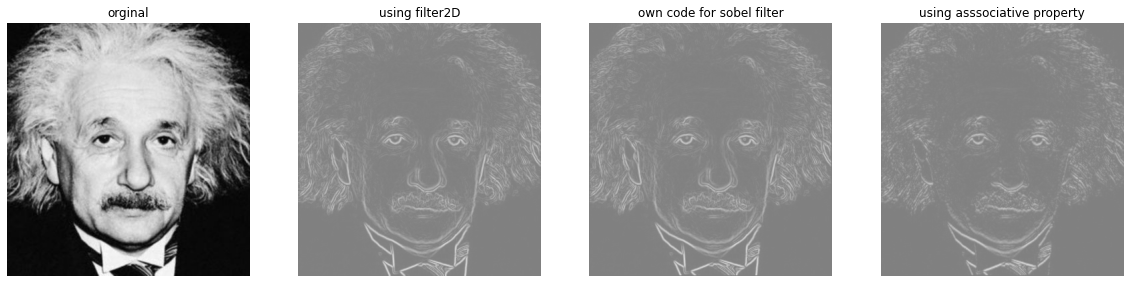

In [3]:
#6)
import math

einstein = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert einstein is not None

fig, ax = plt.subplots(1,4, figsize=(20,20))
ax[0].axis('off')
ax[0].title.set_text('orginal')
ax[0].imshow(einstein, cmap = 'gray', vmin =0, vmax=255)

#a)
kernel_y = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype = np.float32)
image_y = cv.filter2D(einstein, -1, kernel_y)

kernel_x = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype = np.float32)
image_x = cv.filter2D(einstein, -1, kernel_x)

grad_mag = np.sqrt(image_y**2 + image_x**2)

ax[1].axis('off')
ax[1].title.set_text('using filter2D')
ax[1].imshow(grad_mag, cmap = 'gray', vmin =-1020, vmax=1020)

#b)
def filter(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1] % 2 == 1
    kernel_h, kernel_w = math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    image_h, image_w = image.shape
    image_float = image.astype('float')
    filtered = np.zeros(image.shape, 'float')

    for i in range(kernel_h, image_h - kernel_h):
        for j in range(kernel_w , image_w - kernel_w):
            filtered[i, j] = np.dot(image_float[i - kernel_h : i + kernel_h + 1 , j - kernel_w : j+ kernel_w + 1].flatten(), kernel.flatten())

    return filtered

image_y1 = filter(einstein, kernel_y)
image_x1 = filter(einstein, kernel_x)
grad_mag1 = np.sqrt(image_y1**2 + image_x1**2)

ax[2].axis('off')
ax[2].title.set_text('own code for sobel filter')
ax[2].imshow(grad_mag1, cmap = 'gray', vmin =-1020, vmax=1020)

#c)
kernel_y1 = np.array([-1, 0, 1], dtype = np.float32)
kernel_y2 = np.array([[-1], [2], [1]], dtype = np.float32)
image_y2 = cv.filter2D(einstein, -1, kernel_y1)
image_y2 = cv.filter2D(image_y2, -1, kernel_y2)

kernel_x1 = np.array([-1, -2, -1], dtype = np.float32)
kernel_x2 = np.array([[1], [0], [-1]], dtype = np.float32)
image_x2 = cv.filter2D(einstein, -1, kernel_x1)
image_x2 = cv.filter2D(image_x2, -1, kernel_x2)

grad_mag2 = np.sqrt(image_y2**2 + image_x2**2)

ax[3].axis('off')
ax[3].title.set_text('using asssociative property')
ax[3].imshow(grad_mag2, cmap = 'gray', vmin =-1020, vmax=1020)

del einstein; del image_x; del image_x1; del image_x2; del image_y; del image_y1; del image_y2
del grad_mag; del grad_mag1; del grad_mag2
del kernel_x; del kernel_x1; del kernel_x2; del kernel_y; del kernel_y1; del kernel_y2

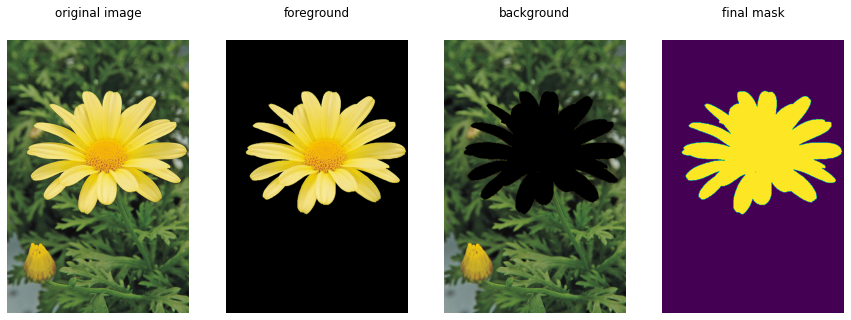

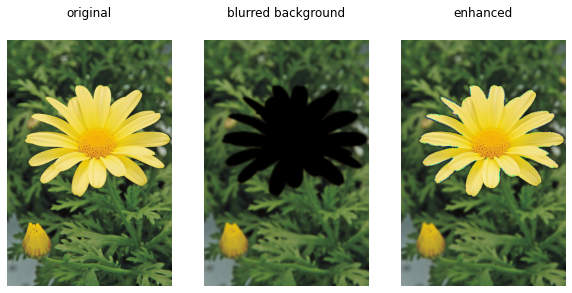

In [6]:
#7)
daisy = cv.imread(r'E:\Aca\aca sem 4\Image Processing & Machine vision\Assignments\Assignment_1\daisy.jpg', cv.IMREAD_COLOR)
assert daisy is not None
daisy_rgb = cv.cvtColor(daisy, cv.COLOR_BGR2RGB)

fig1, ax = plt.subplots(1,4, figsize=(15,10))
ax[0].imshow(daisy_rgb)
ax[0].title.set_text('original image')
ax[0].axis('off')
ax[0].xaxis.tick_top()

#a)
mask = np.zeros(daisy_rgb.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (30,70,650,550)

cv.grabCut(daisy_rgb,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
fore = daisy_rgb*mask2[:,:,np.newaxis]
back = daisy_rgb - fore

ax[1].imshow(fore)
ax[1].title.set_text('foreground')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(back)
ax[2].title.set_text('background')
ax[2].axis('off')
ax[2].xaxis.tick_top()

ax[3].imshow(mask2)
ax[3].title.set_text('final mask')
ax[3].axis('off')
ax[3].xaxis.tick_top()


#b)
fig2, ax = plt.subplots(1,3, figsize=(10,5))
ax[0].imshow(daisy_rgb)
ax[0].title.set_text('original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

blurred_bg = cv.GaussianBlur(back, (9,9), 4)
enhanced = fore + blurred_bg

ax[1].imshow(blurred_bg)
ax[1].title.set_text('blurred background')
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(enhanced)
ax[2].title.set_text('enhanced')
ax[2].axis('off')
ax[2].xaxis.tick_top()

del daisy; del daisy_rgb; del fore; del back; del blurred_bg; del enhanced
del mask; del bgdModel; del fgdModel

7)
c) Because, when blurring the background using gaussian kernel, background just beyond the edge of the flower is affected by the neighboring  darker pixels contained in the flower.
In the background flower is replaced by the dark pixels.